In [2]:
# # Mount your own google drive to Colab
# from google.colab import drive

# drive.mount("/content/gdrive")
# import sys

# # Change the path below to the path where your folder locates
# sys.path.append("/content/gdrive/MyDrive/PS2")

In [3]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

In [4]:
######################################################################
# classes
######################################################################


class Data:
    def __init__(self, X=None, y=None):
        """
        Data class.

        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y

    def load(self, filename):
        """
        Load csv file into X array of features and y array of labels.

        Parameters
        --------------------
            filename -- string, filename
        """

        # load data
        with open(filename, "r") as fid:
            data = np.loadtxt(fid, delimiter=",")

        # separate features and labels
        self.X = data[:, :-1]
        self.y = data[:, -1]

    def plot(self, **kwargs):
        """Plot data."""

        if "color" not in kwargs:
            kwargs["color"] = "b"

        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel("x", fontsize=16)
        plt.ylabel("y", fontsize=16)
        plt.show()


# wrapper functions around Data class
def load_data(filename):
    data = Data()
    data.load(filename)
    return data


def plot_data(X, y, **kwargs):
    data = Data(X, y)
    data.plot(**kwargs)

In [20]:
class PolynomialRegression:
    def __init__(self, m=1):
        """
        Ordinary least squares regression.

        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m

    def generate_polynomial_features(self, X):
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].

        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features

        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n, d = X.shape

        ### ========== START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        Phi = X
        m = self.m_

        # When m = 1, Phi is a matrix of shape (n, 2)
        # with the first column equal to 1 and the second column equal to X
        Phi = Phi.repeat(m + 1, axis=1) ** np.arange(0, m + 1)

        ### ========== END ========== ###

        return Phi

    def fit_GD(self, X, y, eta=None, eps=0, tmax=10000, verbose=False):
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes

        Returns
        --------------------
            self    -- an instance of self
        """

        if verbose:
            plt.subplot(1, 2, 2)
            plt.xlabel("iteration")
            plt.ylabel(r"$J(\theta)$")
            plt.ion()
            plt.show()

        X = self.generate_polynomial_features(X)  # map features
        n, d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)  # coefficients
        err_list = np.zeros((tmax, 1))  # errors per iteration

        # GD loop
        for t in range(tmax):
            ### ========== START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None:
                eta = 1 / (1 + t)
            else:
                eta = eta_input
            ### ========== END ========== ###

            ### ========== START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math

            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = X @ self.coef_
            self.coef_ -= 2 * eta * (y_pred - y) @ X
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
            ### ========== END ========== ###

            # stop?
            if t > 0 and abs(err_list[t] - err_list[t - 1]) <= eps:
                break

            # debugging
            if verbose:
                x = np.reshape(X[:, 1], (n, 1))
                cost = self.cost(x, y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t + 1], [cost], "bo")
                plt.suptitle("iteration: %d, cost: %f" % (t + 1, cost))
                plt.draw()
                plt.pause(0.05)  # pause for 0.05 sec

        print("number of iterations: %d" % (t + 1))

        return self

    def fit(self, X, y):
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X)  # map features

        ### ========== START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        self.coef_ = np.linalg.pinv(X.T @ X) @ X.T @ y

        ### ========== END ========== ###

    def predict(self, X):
        """
        Predict output for X.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features

        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None:
            raise Exception("Model not initialized. Perform a fit first.")

        X = self.generate_polynomial_features(X)  # map features

        ### ========== START ========== ###
        # part c: predict y
        y = X @ self.coef_
        ### ========== END ========== ###

        return y

    def cost(self, X, y):
        """
        Calculates the objective function.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== START ========== ###
        # part d: compute J(theta)
        cost = np.sum((self.predict(X) - y) ** 2)
        ### ========== END ========== ###
        return cost

    def rms_error(self, X, y):
        """
        Calculates the root mean square error.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== START ========== ###
        # part h: compute RMSE
        error = np.sqrt(self.cost(X, y) / X.shape[0])
        ### ========== END ========== ###
        return error

    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs):
        """Plot regression line."""
        if "color" not in kwargs:
            kwargs["color"] = "r"
        if "linestyle" not in kwargs:
            kwargs["linestyle"] = "-"

        X = np.reshape(np.linspace(0, 1, n), (n, 1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

(20, 1) (20,)
(20, 1) (20,)
Visualizing data...


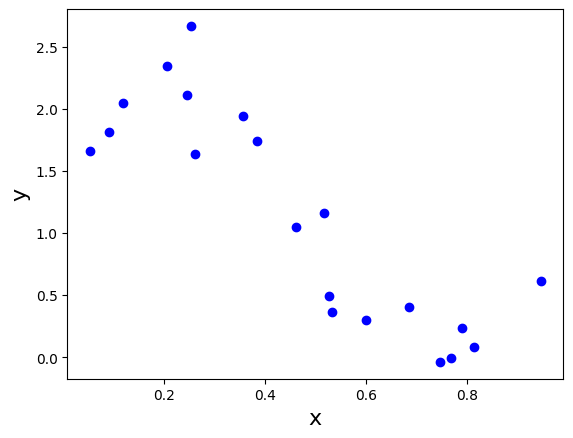

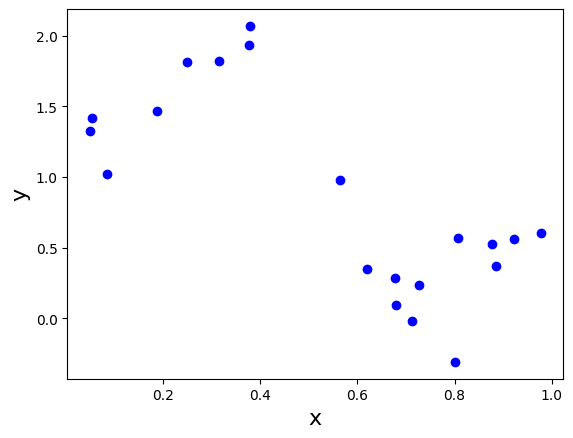

Investigating linear regression...
Training with eta=0.0001...
number of iterations: 10000
Coefficients are [ 2.27044798 -2.46064834]
Final value of objective function is 4.0863970367957645
Gradient descent with eta=0.0001 took 0.1279160976409912 seconds

Training with eta=0.001...
number of iterations: 7021
Coefficients are [ 2.4464068 -2.816353 ]
Final value of objective function is 3.9125764057919437
Gradient descent with eta=0.001 took 0.09298992156982422 seconds

Training with eta=0.01...
number of iterations: 757
Coefficients are [ 2.44640702 -2.81635344]
Final value of objective function is 3.912576405791494
Gradient descent with eta=0.01 took 0.008220911026000977 seconds

Training with eta=0.1...


/Users/dragon/memes/ucla/cs-m146/hw2/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/d3/c3y73d4x0v58hgk0pj7vdvn80000gn/T/ipykernel_11089/2787167029.py:97: RuntimeWarning: overflow encountered in power
  err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
/var/folders/d3/c3y73d4x0v58hgk0pj7vdvn80000gn/T/ipykernel_11089/2787167029.py:101: RuntimeWarning: invalid value encountered in subtract
  if t > 0 and abs(err_list[t] - err_list[t - 1]) <= eps:
/var/folders/d3/c3y73d4x0v58hgk0pj7vdvn80000gn/T/ipykernel_11089/2787167029.py:95: RuntimeWarning: overflow encountered in matmul
  y_pred = X @ self.coef_
/var/folders/d3/c3y73d4x0v58hgk0pj7vdvn80000gn/T/ipykernel_11089/2787167029.py:96: RuntimeWarning: invalid value encountered in subtract
  self.coef_ -= 2 * eta * (y_pred - y) @ X


number of iterations: 10000
Coefficients are [nan nan]
Final value of objective function is nan
Gradient descent with eta=0.1 took 0.11098003387451172 seconds

Using closed form...
Coefficients are [ 2.44640709 -2.81635359]
Final value of objective function is 3.9125764057914636
Closed form took 0.005268096923828125 seconds

Gradient descent with automatic learning rate...
number of iterations: 1307
Coefficients are [ 2.4464068  -2.81635299]
Final value of objective function is 3.9125764057919525
Gradient descent with automatic learning rate took 0.015146970748901367 seconds
Investigating polynomial regression...
For m=0, train RMSE is 0.8570606234439588 and test RMSE is 0.7472683641851717
For m=1, train RMSE is 0.44229946901344247 and test RMSE is 0.593594963602829
For m=2, train RMSE is 0.44131496568291906 and test RMSE is 0.5957110445316887
For m=3, train RMSE is 0.24426921898418785 and test RMSE is 0.37194297617204725
For m=4, train RMSE is 0.22968276125805687 and test RMSE is 0.36

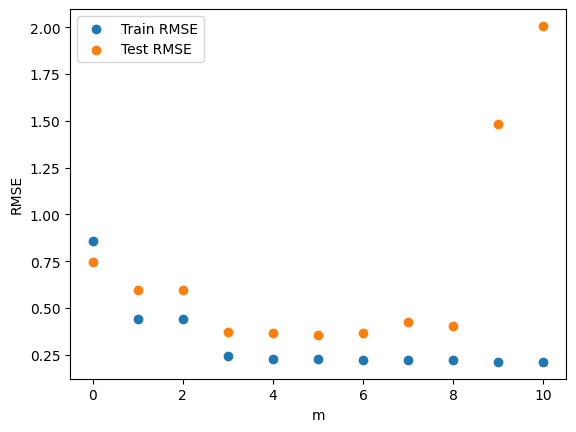

Done!


In [21]:
######################################################################
# main
######################################################################


def main():
    # load data
    # Use the abs path on your own Google Drive
    train_data = load_data("regression_train.csv")
    test_data = load_data("regression_test.csv")

    print(train_data.X.shape, train_data.y.shape)
    print(test_data.X.shape, test_data.y.shape)

    ### ========== START ========== ###
    # part a: main code for visualizations
    print("Visualizing data...")

    plot_data(train_data.X, train_data.y)
    plot_data(test_data.X, test_data.y)

    ### ========== END ========== ###

    ### ========== START ========== ###
    # parts b-f: main code for linear regression
    print("Investigating linear regression...")

    import time

    # part c
    model = PolynomialRegression()
    for eta in [1e-4, 1e-3, 1e-2, 1e-1]:
        print(f"Training with {eta=}...")
        start_time = time.time()
        model.fit_GD(train_data.X, train_data.y, eta=eta)
        end_time = time.time()
        print(f"Coefficients are {model.coef_}")
        print(
            f"Final value of objective function is {model.cost(train_data.X, train_data.y)}"
        )
        print(f"Gradient descent with {eta=} took {end_time - start_time} seconds")
        print()

    # part d
    print("Using closed form...")
    start_time = time.time()
    model.fit(train_data.X, train_data.y)
    end_time = time.time()
    print(f"Coefficients are {model.coef_}")
    print(
        f"Final value of objective function is {model.cost(train_data.X, train_data.y)}"
    )
    print(f"Closed form took {end_time - start_time} seconds")
    print()

    # part f
    print("Gradient descent with automatic learning rate...")
    start_time = time.time()
    model.fit_GD(train_data.X, train_data.y)
    end_time = time.time()
    print(f"Coefficients are {model.coef_}")
    print(
        f"Final value of objective function is {model.cost(train_data.X, train_data.y)}"
    )
    print(
        f"Gradient descent with automatic learning rate took {end_time - start_time} seconds"
    )

    ### ========== END ========== ###

    ### ========== START ========== ###
    # parts g-i: main code for polynomial regression
    print("Investigating polynomial regression...")

    # part i
    train_rmse = []
    test_rmse = []
    for m in range(11):
        model = PolynomialRegression(m=m)
        model.fit(train_data.X, train_data.y)
        train_rmse.append(model.rms_error(train_data.X, train_data.y))
        test_rmse.append(model.rms_error(test_data.X, test_data.y))
        print(
            f"For {m=}, train RMSE is {train_rmse[-1]} and test RMSE is {test_rmse[-1]}"
        )

    plt.scatter(range(11), train_rmse, label="Train RMSE")
    plt.scatter(range(11), test_rmse, label="Test RMSE")
    plt.xlabel("m")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

    ### ========== END ========== ###

    print("Done!")


if __name__ == "__main__":
    main()